<a href="https://colab.research.google.com/github/KartikKumar7070/Yesbank-stock-pricing-analysis-regression-model/blob/main/ML_Capstone_Project_On_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    -**Yes Bank Stock Closing Price Prediction** 



##### **Project Type**    - Regression
##### **Contribution**    - Individual


# **Project Summary -**

Write the summary here within 500-600 words.

# **GitHub Link -**

https://github.com/KartikKumar7070/Yesbank-stock-pricing-analysis-regression-model.git

# **Problem Statement**


###Yes Bank is a well-known bank in the Indian financial domain. Since 2018, it has been in the news because of the fraud case involving Rana Kapoor. Owing to this fact, it was interesting to see how that impacted the stock prices of the company and whether Time series models or any other predictive models can do justice to such situations. This dataset has monthly stock prices of the bank since its inception and includes closing, starting, highest, and lowest stock prices of every month. The main objective is to predict the stock’s closing price of the month.

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required. 
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits. 
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule. 

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [ ]:
#import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from sklearn.metrics import *

from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression as LR
from xgboost import XGBRegressor
from sklearn import neighbors
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score
from sklearn.pipeline import Pipeline
     

### Dataset Loading

In [ ]:
#mount drive
from google.colab import drive
drive.mount('/content/drive')
     

Mounted at /content/drive


In [ ]:
# Load Dataset
df = pd.read_csv('/content/drive/MyDrive/ML Capstone Regression Project-1(YBCPP)/data_YesBank_StockPrices.csv')

### Dataset First View

In [ ]:
# Dataset First Look
df.head()

,Date,Open,High,Low,Close
0,Jul-05,13.00,14.00,11.25,12.46
1,Aug-05,12.58,14.88,12.55,13.42
2,Sep-05,13.48,14.87,12.27,13.30
3,Oct-05,13.20,14.47,12.40,12.99
4,Nov-05,13.35,13.88,12.88,13.41


In [ ]:
df.tail()

,Date,Open,High,Low,Close
180,Jul-20,25.60,28.30,11.10,11.95
181,Aug-20,12.00,17.16,11.85,14.37
182,Sep-20,14.30,15.34,12.75,13.15
183,Oct-20,13.30,14.01,12.11,12.42
184,Nov-20,12.41,14.90,12.21,14.67


### Dataset Rows & Columns count

In [ ]:
# Dataset Rows & Columns count
df.shape

(185, 5)

### Dataset Information

In [ ]:
# Dataset Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185 entries, 0 to 184
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    185 non-null    object 
 1   Open    185 non-null    float64
 2   High    185 non-null    float64
 3   Low     185 non-null    float64
 4   Close   185 non-null    float64
dtypes: float64(4), object(1)
memory usage: 7.4+ KB


#### Duplicate Values

In [ ]:
# Dataset Duplicate Value Count
len(df[df.duplicated()])

0

#### Missing Values/Null Values

In [ ]:
# Missing Values/Null Values Count
df.isnull().sum()

Date     0
Open     0
High     0
Low      0
Close    0
dtype: int64

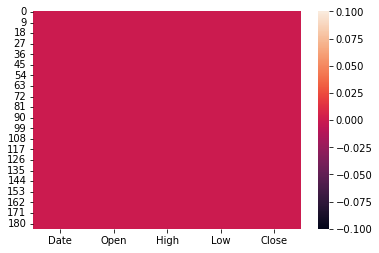

In [ ]:
# Visualizing the missing values
sns.heatmap(df.isnull(),cbar=True) 

### What did you know about your dataset?

###This dataset of Yes Bank gives us information about the opening and closing prices of our stock,here our independent variable are Date,Open,High,Low columns and close column is our dependent variable that we need to predict.This dataset is a really good dataset as there are no null or duplicated values so we need not to do any manipulations in our dataset so far.We need to convert our date column to proper date time format.

## ***2. Understanding Your Variables***

In [ ]:
# Dataset Columns
df.columns

Index(['Date', 'Open', 'High', 'Low', 'Close'], dtype='object')

In [ ]:
# Dataset Describe
df.describe()

,Open,High,Low,Close
count,185.000000,185.000000,185.000000,185.000000
mean,105.541405,116.104324,94.947838,105.204703
std,98.879850,106.333497,91.219415,98.583153
min,10.000000,11.240000,5.550000,9.980000
25%,33.800000,36.140000,28.510000,33.450000
50%,62.980000,72.550000,58.000000,62.540000
75%,153.000000,169.190000,138.350000,153.300000
max,369.950000,404.000000,345.500000,367.900000


### Variables Description 


We have 185 rows and 4 columns in our dataset with no null values. Here our dependent variable will be *Close*, and independent variables are - *Open, High  and Low*.

* **Date:**  It denotes the month and year of the for a particular price.
* **Open:**  Open means the price at which a stock started trading that month.
* **High:**  refers to the maximum price that month.
* **Low:**   refers to the minimum price that month.
* **Close:** refers to the final trading price for that month, which we have to predict using regression

### Check Unique Values for each variable.

In [ ]:
# Check Unique Values for each variable.
df.nunique()

Date     185
Open     183
High     184
Low      183
Close    185
dtype: int64

## 3. ***Data Wrangling***

### Data Wrangling Code

In [ ]:

#copying data to preserve orignal file
df1 = df.copy()

In [ ]:
# converting 'Date' into datetime - YYYY-MM-DD
from datetime import datetime
df1['Date'] = pd.to_datetime(df1['Date'].apply(lambda x: datetime.strptime(x, '%b-%y')))


In [ ]:
#set date as index
df1.set_index('Date',inplace=True)

In [ ]:
#check if changes are being reflected
df1.head(1)

,Open,High,Low,Close
Date,,,,
2005-07-01,13.0,14.0,11.25,12.46


### What all manipulations have you done and insights you found?

###Mainly in this dataset i have coverted my Date column into datetime format(YY-MM-DD) as the model will not take values other than numeric also in this dataset there is not so much of manipulations as there no null values in the dataset.

# **EDA AND Data Pre-Processing**

###Defing the independenyt and dependent variables

In [ ]:
indep_var=df1[['High','Low','Open']]
dep_var=df1['Close']

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

**UNIVARIATE ANALYSIS**
---
We will take a look at distribution plots of our features.


/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

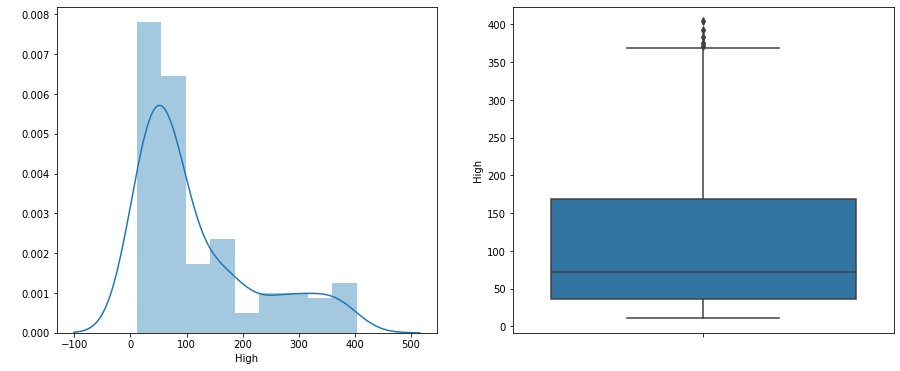

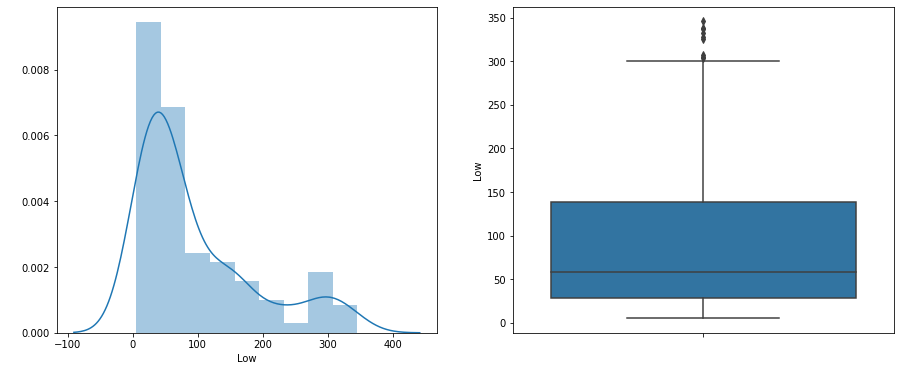

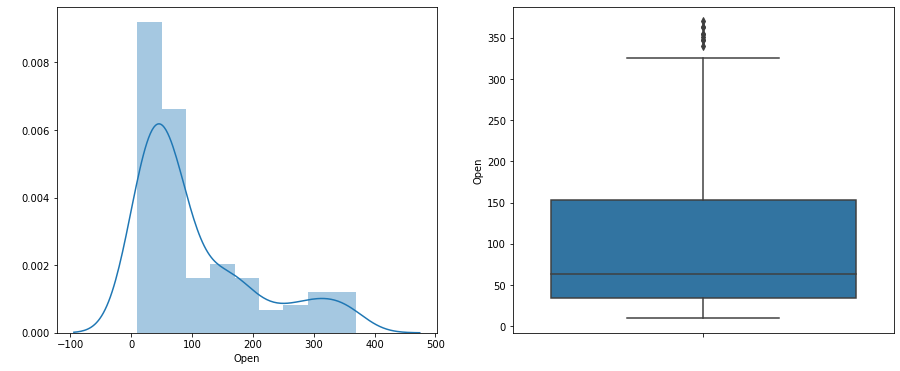

In [ ]:
#plots for independent variables
for var in indep_var:
    plt.figure(figsize=(15,6))
    plt.subplot(1, 2, 1)
    fig = sns.distplot(df1[var].dropna())
    fig.set_ylabel(' ')
    fig.set_xlabel(var)

    plt.subplot(1, 2, 2)
    fig = sns.boxplot(y=df1[var])
    fig.set_title('')
    fig.set_ylabel(var)



##### 1. Why did you pick the specific chart?

###So here i have chosen distribution plot and boxplot the distribution plot will help me understand how are my independent variable distributed across entire dataset and is there a need for transformation in my dataset and boxplot helps me understand the outliers in my independent variables so that i can understand if any outlier treatment has to be done or not.

##### 2. What is/are the insight(s) found from the chart?

###All my independent variables are skewed both negatively and positively but the concentration of positive is more so we can apply log transformation as it is less skewed and the boxplot shows that there are not much of outliers in my data the outliers that we are seeing in boxplot may add some useful information about the stock pricing so we will not be removing outliers as each observation is important for our stockpricing predictions

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

###People are most sought to buy the stock when the prices are between 0-100 and after that we can see a negative impact in our pricing as less number of people tend to buy afer this range ie. 0-100 is crossed

#### Chart - 2

DATA TRANSFORMATION

---
Since our data is skewed, we will perform some transformations during regression analysis. Let's visualize how our data will look like post transformation.


/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

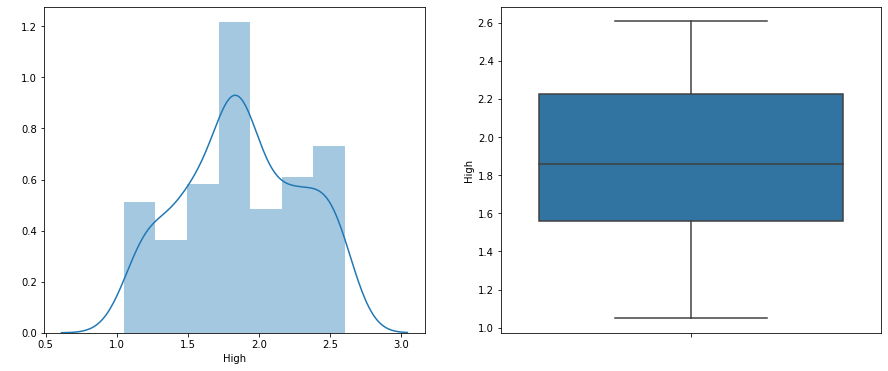

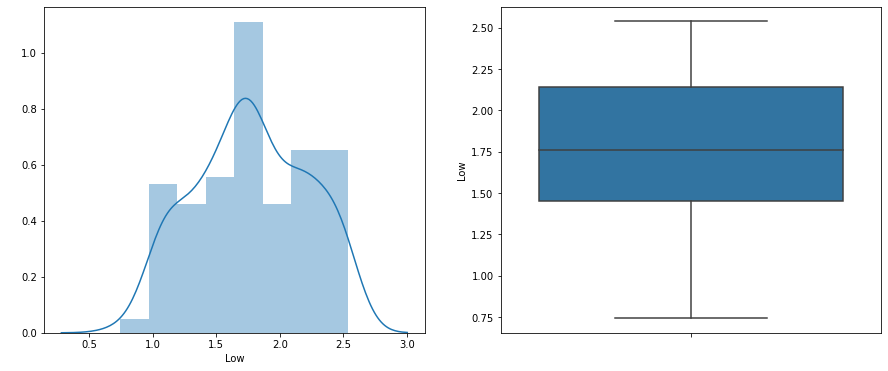

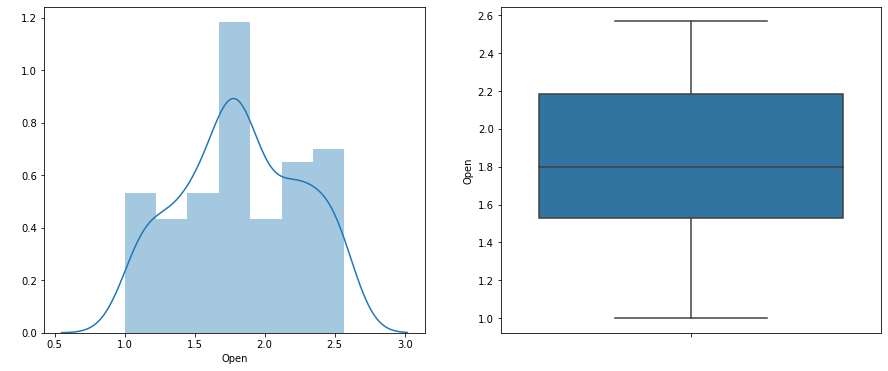

In [ ]:

#independent variables
for var in indep_var:
    plt.figure(figsize=(15,6))
    plt.subplot(1, 2, 1)
    fig = sns.distplot(np.log10(df1[var]))
    fig.set_ylabel(' ')
    fig.set_xlabel(var)

    plt.subplot(1, 2, 2)
    fig = sns.boxplot(y=np.log10(df1[var]))
    fig.set_title('')
    fig.set_ylabel(var)

##### 1. Why did you pick the specific chart?

###So here i have chosen distribution plot and boxplot the distribution plot will help me understand how are my independent variable distributed across entire dataset and is there a need for transformation in my dataset and boxplot helps me understand the outliers in my independent variables so that i can understand if any outlier treatment has to be done or not.

##### 2. What is/are the insight(s) found from the chart?

###After the transformation has been applied our distribution plot is somewhat extend to a normally distributed and in our boxplot we can see that there are no more outliers aswell.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

###We have just applied the transformation in our independent variables so the only from this we get that is our independent variables are normally distributed and have no outliers aswell,we cannot comment on the positive or negative impact from this.

#### Chart - 3

DEPENDENT VARIABLE

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0, 0.5, 'Open')

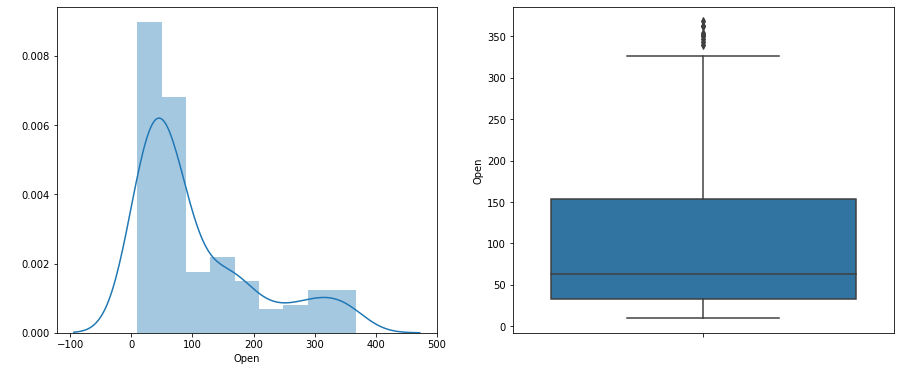

In [ ]:
#plots for dependent variable
plt.figure(figsize=(15,6))
plt.subplot(1, 2, 1)
fig = sns.distplot(df1['Close'].dropna())
fig.set_ylabel(' ')
fig.set_xlabel(var)

plt.subplot(1, 2, 2)
fig = sns.boxplot(y=df1['Close'])
fig.set_title('')
fig.set_ylabel(var)

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 4

**BIVARIATE ANALYSIS**

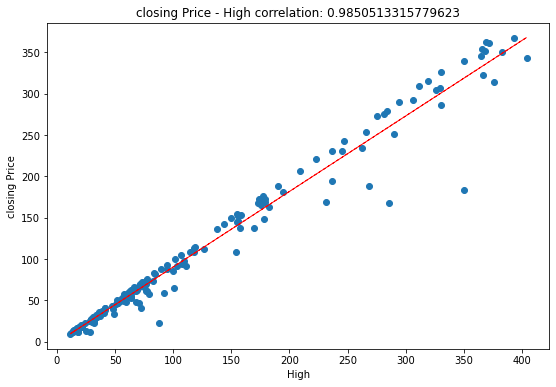

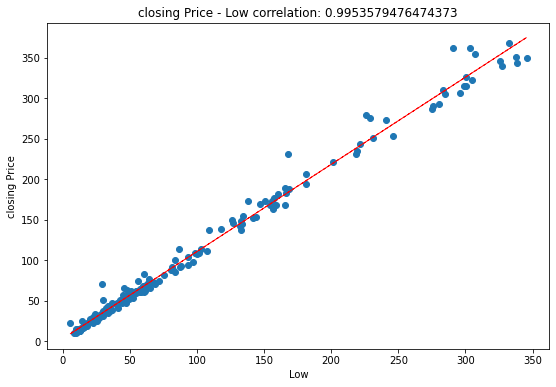

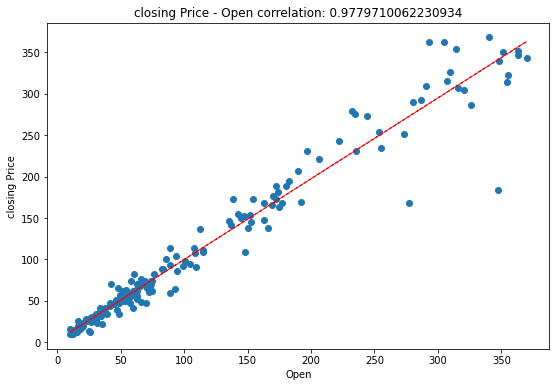

In [ ]:
#scatter plot between dependent variable with all independent variables.
for col in indep_var:
   fig = plt.figure(figsize=(9, 6))
   ax = fig.gca()
   feature = df1[col]
   label = df1['Close']
   correlation = feature.corr(label)
   plt.scatter(x=feature, y=label)
   plt.xlabel(col)
   plt.ylabel('closing Price')
   ax.set_title('closing Price - ' + col + ' correlation: ' + str(correlation))
   z = np.polyfit(df1[col], df1['Close'], 1)
   y_hat = np.poly1d(z)(df1[col])
 
   plt.plot(df1[col], y_hat, "r--", lw=1)
 
plt.show()

##### 1. Why did you pick the specific chart?

#####So here we are using a scatter plot to see how are all my datapoints scattered all over the dataset and also to see how our different independent variables are corelated to the dependent variable also we are using a polyfit of order 1 to see the best fit line. 

##### 2. What is/are the insight(s) found from the chart?

So from our scatter plot we can see all my independent variables ie High,Low,Open are highly corelated to the dependent variable ie Close.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

All my independent variables are positively corelated to my dependent variable so any change in independent variable will affect highly to the dependent variable.We can clearly make out that all the independent variables are linearly affecting our dependent variable.

Chart-5 
###**Correlation Heatmap**

Now, we will see the correlation between all the features in our data set.

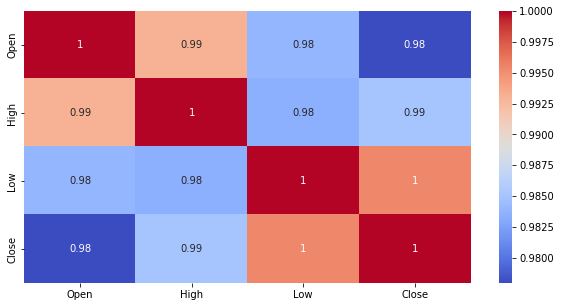

In [ ]:
# Correlation Heatmap visualization code
plt.figure(figsize=(10,5))
sns.heatmap(df1.corr(), annot = True, cmap='coolwarm')
plt.show()



##### 1. Why did you pick the specific chart?

Correlation heatmaps are a type of plot that visualize the strength of relationships between numerical variables. Correlation plots are used to understand which variables are related to each other and the strength of this relationship.

##### 2. What is/are the insight(s) found from the chart?

From this Corelation heatmap we can see all my independent variable are highly corelated with each other aswell as with dependent variable.

#### Chart - 15 - Pair Plot 

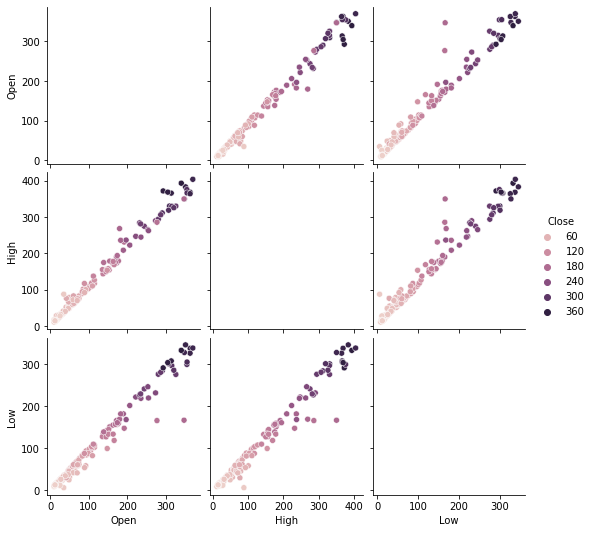

In [ ]:
# Pair Plot visualization code
sns.pairplot(df1,hue='Close')

##### 1. Why did you pick the specific chart?

Using a pair-plot we aim to visualize the correlation of each feature pair in a dataset against the class distribution at a one glance.Since a pair plot visually gives an idea of correlation of each feature pair, it helps us to understand and quickly analyse the correlation matrix (Pearson) of the dataset as well.

##### 2. What is/are the insight(s) found from the chart?

From this pairplot we can see all my independent variable are highly corelated with each other aswell as with dependent variable.

## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

Answer Here.

### Hypothetical Statement - 1

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

#####Null Hypothesis - Predict the stock’s closing price of the month.
#####Alternate Hypothesis - Not able to predict the stock’s closing price of the month.

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [ ]:
indep_var = sm.add_constant(indep_var) ## let's add an intercept (beta_0) to our model
model = sm.OLS(dep_var, indep_var).fit() ## sm.OLS(output, input)
predictions = model.predict(indep_var)

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [ ]:
# Print out the statistics
model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Close   R-squared:                       0.995
Model:                            OLS   Adj. R-squared:                  0.995
Method:                 Least Squares   F-statistic:                 1.219e+04
Date:                Sun, 08 Jan 2023   Prob (F-statistic):          1.60e-208
Time:                        08:12:30   Log-Likelihood:                -619.85
No. Observations:                 185   AIC:                             1248.
Df Residuals:                     181   BIC:                             1261.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.3228      0.768      1.723      0.087      -0.192       2.837
High           0.5392      0.043     12.527      0.000       0.454       0.624
Low            0.9994      0.033     30.152      0.000       0.934       1.065
Open          -0.5080      0.047    -10.791      0.000      -0.601      -0.415
==============================================================================
Omnibus:                       42.580   Durbin-Watson:                   2.088
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              526.377
Skew:                          -0.289   Prob(JB):                    5.00e-115
Kurtosis:                      11.243   Cond. No.                         375.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

##### Which statistical test have you done to obtain P-Value?

I have used statsmodel.api statistical test to obtain the P-value.

##### Why did you choose the specific statistical test?

I was aware of this test from my earlier self projects so i used it.

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

Our dataset has no missing or null values.

### 2. Handling Outliers

The outliers which we have in our dataset will be removed when we apply any scaling and also the outliers in case of our data can be a useful number for analysis.

### 3. Categorical Encoding

There is no need of categorical encoding in this dataset as all our columns are numerics and datetime format.

### 4. Feature Manipulation & Selection

#### 1. Feature Manipulation

In [ ]:
# Manipulate Features to minimize feature correlation and create new features
#Multicollinearity
#VIF score

def calc_vif(X):
 
   # Calculating VIF
   vif = pd.DataFrame()
   vif["variables"] = X.columns
   vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
 
   return(vif)


In [ ]:
calc_vif(indep_var)

,variables,VIF
0,const,2.239276
1,High,79.199072
2,Low,34.563462
3,Open,81.926279


Even though we have high VIF scores, we will not perform feature engineering because for this particular use case, each feature is important. In the real world, most indicators take into account each of these features to predict future values.

#### 2. Feature Selection

All the features in my dataset are equally important and we cannot make new features out of them.

### 5. Data Transformation

#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

I dont think in our dataset there is a need for the data to be transformed because there is not much noise in our dataset and also it is mostly positively skewed and resembling to somewhat a normal distribution only.

### 6. Data Splitting

In [ ]:
# Split your data to train and test. Choose Splitting ratio wisely.
x_train, x_test,y_train, y_test = train_test_split(indep_var,dep_var,test_size=.20,random_state=1)


##### What data splitting ratio have you used and why? 

I am using a standard 80/20 train to test ratio because in this ratio we are enough data to our training model to understand our data and also we are have test model in which we can further check our predictions.


### 6. Data Scaling

In [ ]:
# Scaling your data
#data transformation
scaler = MinMaxScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)


##### Which method have you used to scale you data and why?

I have used a minmaxscaler to scale my data as it works good on digits(numeric) columns.

### 7. Dimesionality Reduction

##### Do you think that dimensionality reduction is needed? Explain Why?

No there is no need for dimensionality reduction in our dataset as it a small dataset with 185 rows and 5 columns.

### 8. Handling Imbalanced Dataset

##### Do you think the dataset is imbalanced? Explain Why.

No the data is not imbalanced as our dependent variable is evenly distributed over all datapoints and also this type of problem mainly occur in classification models.

## ***7. ML Model Implementation***

### ML Model - 1

In [ ]:
# ML Model - 1 Implementation

# Fit the Algorithm

# Predict on the model

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### ML Model - 2

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

#### 3. Explain each evaluation metric's indication towards business and the business impact pf the ML model used.

Answer Here.

### ML Model - 3

In [ ]:
# ML Model - 3 Implementation

# Fit the Algorithm

# Predict on the model

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 3 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

Answer Here.

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

Answer Here.

### 3. Explain the model which you have used and the feature importance using any model explainability tool?

Answer Here.

## ***8.*** ***Future Work (Optional)***

### 1. Save the best performing ml model in a pickle file or joblib file format for deployment process.


In [ ]:
# Save the File

### 2. Again Load the saved model file and try to predict unseen data for a sanity check.


In [ ]:
# Load the File and predict unseen data.

### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

# **Conclusion**

Write the conclusion here.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***